In [1]:
BASE_FOLDER =  r'../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
def mel(s,sr, c= 0):
    wmf = memory_wave_file()
    wmf.filepath=file_path
    wmf.srate=sr
    wmf.channel=s
    fe_mel = feature_extractor_mel(BASE_FOLDER,'mel1')
    fe_mel.set_hyperparamter(n_mels=80, n_fft=1024, channel=c)
    fe_mel.create_from_wav(wmf)
    fe_mel.plot()

def psd(s,sr, c= 0):
    wmf = memory_wave_file()
    wmf.filepath=file_path
    wmf.srate=sr
    wmf.channel=s
    fe_psd = feature_extractor_welchPSD(BASE_FOLDER,'psd1')
    fe_psd.set_hyperparamter(nperseg=512, nfft=1024, channel=c) 
    fe_psd.create_from_wav(wmf) 
    fe_psd.plot()


load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation


In [2]:
def test(file_path):
    ch, sr = librosa.load(os.path.abspath(BASE_FOLDER+file_path), sr=None, mono=False)
    noisy_signal = ch

    wmf = memory_wave_file()
    wmf.filepath = file_path
    wmf.channel = noisy_signal
    wmf.srate = sr
    wmf.length = len(noisy_signal)

    wmf_r = create_augmenter(wmf)
    mel(wmf.channel)
    plt.show()
    mel(wmf_r.channel)
    plt.show()
    return wmf_r

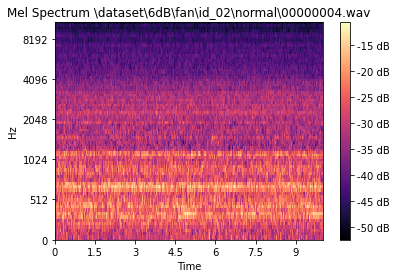

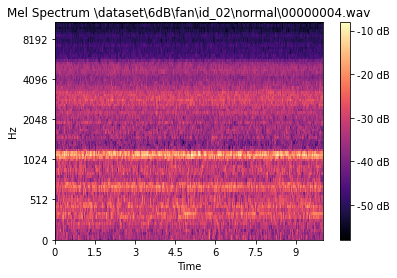

In [27]:
file_path = r'\dataset\6dB\fan\id_02\normal\00000004.wav'
wmf_r = test(file_path)

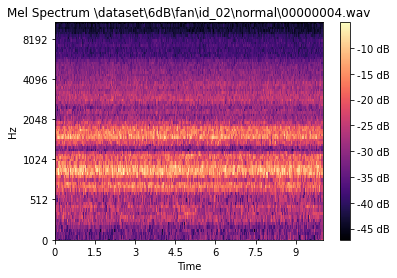

In [23]:
mel(wmf_r.channel,5)

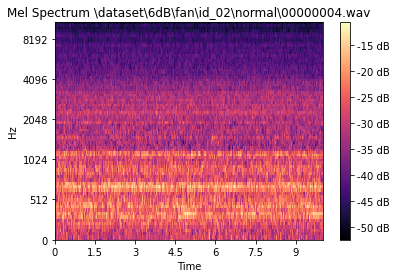

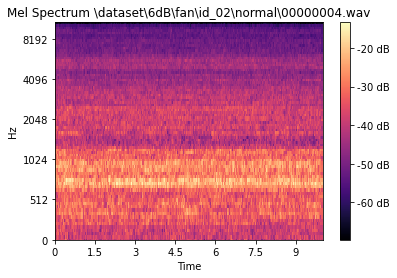

In [28]:
file_path = r'\dataset\6dB\pump\id_02\normal\00000004.wav'
file_path = r'\dataset\6dB\fan\id_02\normal\00000004.wav'
wmf_r = test(file_path)

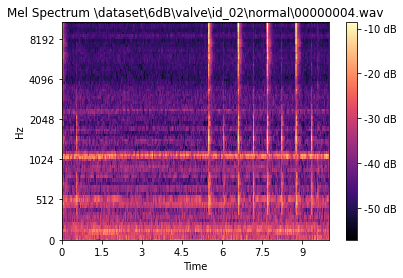

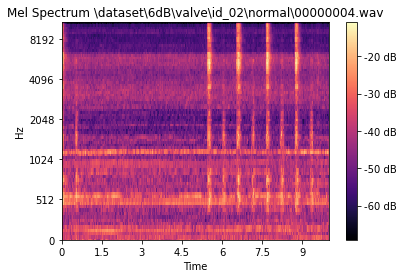

In [30]:
file_path = r'\dataset\6dB\valve\id_02\normal\00000004.wav'
wmf_r = test(file_path)

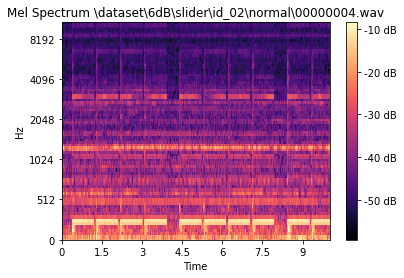

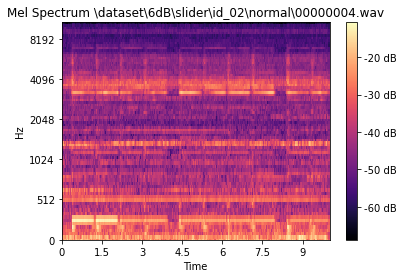

In [32]:
file_path = r'\dataset\6dB\slider\id_02\normal\00000004.wav'
wmf_r = test(file_path)

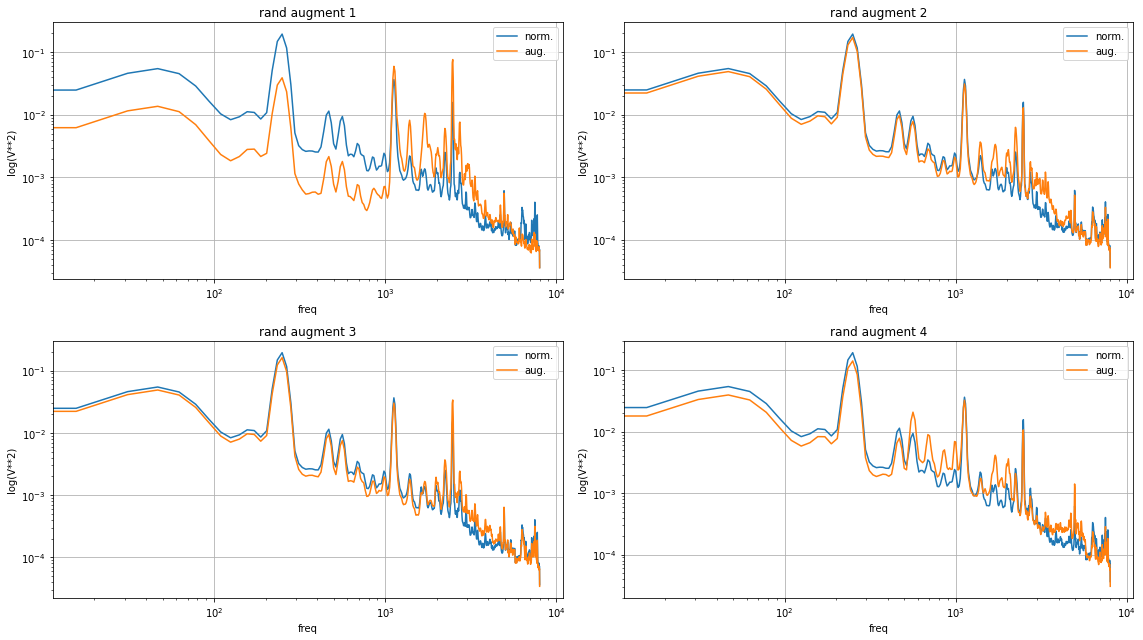

In [5]:
from librosa.util import normalize as norm
def test(file_path):
    ch, sr = librosa.load(os.path.abspath(BASE_FOLDER+file_path), sr=None, mono=False)
    noisy_signal = ch

    wmf = memory_wave_file()
    wmf.filepath = file_path
    wmf.channel = noisy_signal
    wmf.srate = sr
    wmf.length = len(noisy_signal)

    wmf_r = create_augmenter(wmf)
    psd(norm(wmf.channel),sr)
    #plt.show()
    psd(norm(wmf_r.channel),sr)
    plt.grid()
    plt.legend(['norm.','aug.'])
    return wmf_r

file_path = r'\dataset\6dB\slider\id_02\normal\00000004.wav'
plt.figure(figsize=(16,9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    wmf_r = test(file_path)
    plt.title(f'rand augment {i+1}')
    
    

plt.tight_layout()
plt.savefig(f'augment_PSD_slider.png', transparent=False, dpi=300)